Tarea 1
Ricardo Jose Chacon Brenes

Modulo: Machine Learning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv(r'C:\Users\chaconri\Desktop\Data Science TEC\Dataset1.csv', sep=';')

# Reemplazar ";" por ","
data = data.replace(";", ",", regex=True)

# Crear un nuevo DataFrame con los datos preprocesados
df = pd.DataFrame(data)

# Imprimir el DataFrame
print(df.columns)


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera',
       'Shellweight', 'Rings'],
      dtype='object')


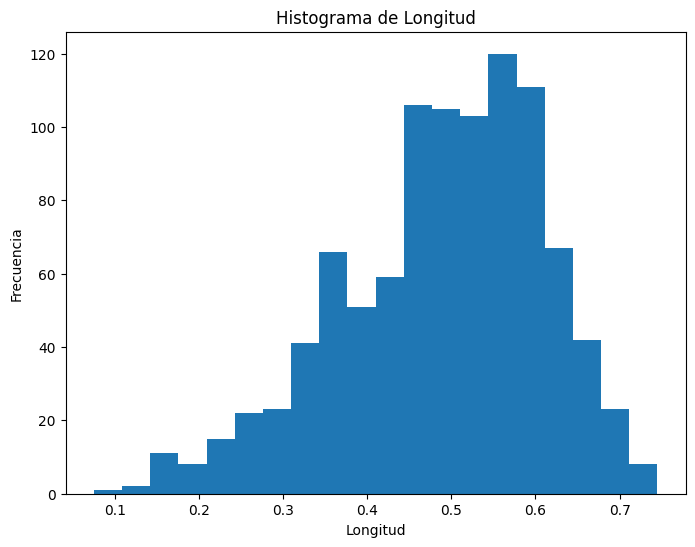

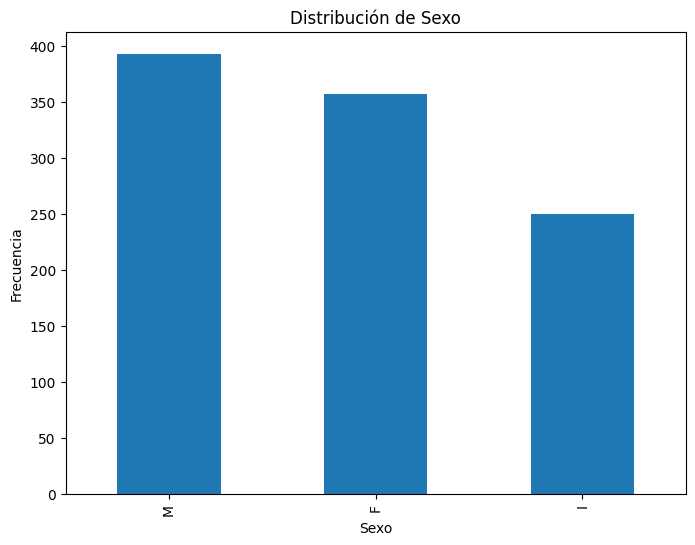

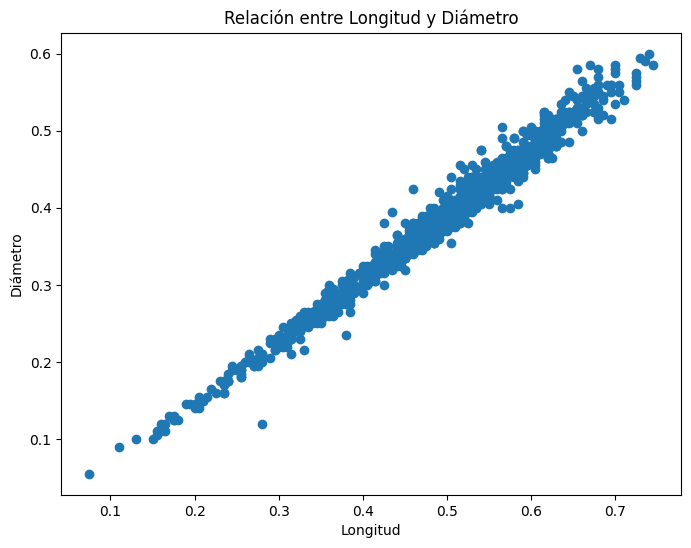

In [4]:
#Histograma

plt.figure(figsize=(8, 6))
plt.hist(df['Length'], bins=20)
plt.title('Histograma de Longitud')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')
plt.show()

#Grafico de Barras

plt.figure(figsize=(8, 6))
df['Sex'].value_counts().plot(kind='bar')
plt.title('Distribución de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()


#Grafico de distorsion
plt.figure(figsize=(8, 6))
plt.scatter(df['Length'], df['Diameter'])
plt.title('Relación entre Longitud y Diámetro')
plt.xlabel('Longitud')
plt.ylabel('Diámetro')
plt.show()





  Sex  Length  Diameter  Height   Whole Shucked  Viscera  Shellweight  Rings   
0   M   0.455     0.365   0.095  0.5140   medio   0.1010        0.150     15  \
1   M   0.350     0.265   0.090  0.2255   medio   0.0485        0.070      7   
2   F   0.530     0.420   0.135  0.6770   medio   0.1415        0.210      9   
3   M   0.440     0.365   0.125  0.5160   medio   0.1140        0.155     10   
4   I   0.330     0.255   0.080  0.2050   medio   0.0395        0.055      7   

   Shucked_liviano  Shucked_medio  Shucked_muy pesado  Shucked_pesado  
0              0.0            1.0                 0.0             0.0  
1              0.0            1.0                 0.0             0.0  
2              0.0            1.0                 0.0             0.0  
3              0.0            1.0                 0.0             0.0  
4              0.0            1.0                 0.0             0.0  


C:\Users\chaconri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


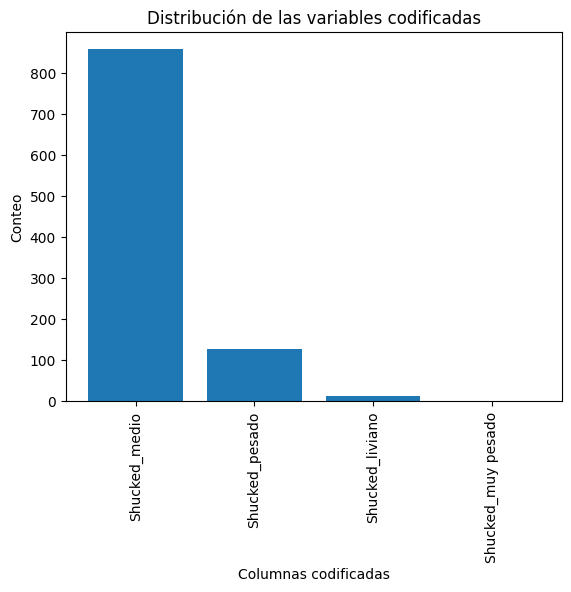

In [5]:
# 2. El atributo Shucked es ordinal, preprocéselo y justifique su selección.
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Crear instancia de OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Ajustar y transformar los datos
encoded_data = encoder.fit_transform(data[['Shucked']])

# Crear un nuevo DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Shucked']))

# Concatenar el DataFrame codificado con el DataFrame original
data_encoded = pd.concat([data, encoded_df], axis=1)

print(data_encoded.head())


# Obtener las columnas codificadas
encoded_columns = encoder.get_feature_names_out(['Shucked'])

# Calcular el conteo de valores para cada columna codificada
value_counts = data_encoded[encoded_columns].sum().sort_values(ascending=False)

# Crear un gráfico de barras
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Columnas codificadas')
plt.ylabel('Conteo')
plt.title('Distribución de las variables codificadas')
plt.xticks(rotation=90)
plt.show()



In [6]:
#  3. El atributo Length tiene valores faltantes, realice imputación de datos y justifique su selección.

from sklearn.impute import SimpleImputer

# Crear un objeto SimpleImputer con la estrategia de la media
imputer = SimpleImputer(strategy='mean')

# Imputar los valores faltantes en el atributo "Length"
data['Length'] = imputer.fit_transform(data[['Length']])



La imputación de datos con la media en el atributo "Length" es una opción adecuada porque nos permite estimar los valores faltantes basándonos en el promedio de los valores existentes. Esta estrategia es sencilla y preserva la distribución general de los datos

In [7]:
# 4 El atributo Rings tienen valores atípicos (outliers) proponga cómo corregirlo(investigue) y hágalo, justifique su selección. 

# Calcular el rango intercuartil (IQR)
Q1 = data['Rings'].quantile(0.25)
Q3 = data['Rings'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar los outliers en el atributo "Rings"
outliers = data[(data['Rings'] < lower_limit) | (data['Rings'] > upper_limit)]

# Reemplazar los outliers con valores más apropiados
data.loc[data['Rings'] < lower_limit, 'Rings'] = lower_limit
data.loc[data['Rings'] > upper_limit, 'Rings'] = upper_limit

El método del rango intercuartil es una forma común de detectar y corregir valores atípicos. Se utiliza porque es simple y efectivo para identificar puntos de datos que se alejan demasiado de la distribución de los demás datos. Al reemplazar los outliers con los valores límite del rango intercuartil, estamos eliminando los valores extremos que podrían afectar negativamente nuestro análisis o modelo.


In [8]:
# 5. El atributo Sex es nominal, preprocéselo y justifique su elección.


# Crear un DataFrame de ejemplo
data = pd.DataFrame({'Sex': ['M', 'F', 'F', 'M', 'I']})

# Aplicar la codificación one-hot
encoded_data = pd.get_dummies(data['Sex'])

# Concatenar el DataFrame original con las nuevas columnas codificadas
data_encoded = pd.concat([data, encoded_data], axis=1)

# Visualizar el resultado
print(data_encoded)


  Sex      F      I      M
0   M  False  False   True
1   F   True  False  False
2   F   True  False  False
3   M  False  False   True
4   I  False   True  False



La codificación one-hot convierte las variables categóricas en columnas binarias separadas, asignando un valor de 1 si la categoría está presente y 0 en caso contrario. Esta técnica facilita el análisis de variables categóricas en modelos de aprendizaje automático.

    Sex  Length  Diameter  Height   Whole Shucked  Viscera  Shellweight  Rings
0     M   0.455     0.365   0.095  0.5140   medio   0.1010        0.150     15
1     M   0.350     0.265   0.090  0.2255   medio   0.0485        0.070      7
2     F   0.530     0.420   0.135  0.6770   medio   0.1415        0.210      9
3     M   0.440     0.365   0.125  0.5160   medio   0.1140        0.155     10
4     I   0.330     0.255   0.080  0.2050   medio   0.0395        0.055      7
..   ..     ...       ...     ...     ...     ...      ...          ...    ...
995   M   0.580     0.490   0.130  1.1335  pesado   0.2565        0.237      9
996   M   0.590     0.465   0.155  1.1360  pesado   0.2615        0.275     11
997   M   0.590     0.470   0.160  1.2060   medio   0.2425        0.309      8
998   F   0.590     0.455   0.145  1.0630  pesado   0.2445        0.250      8
999   F   0.595     0.470   0.155  1.1210   medio   0.1780        0.155     11

[1000 rows x 9 columns]


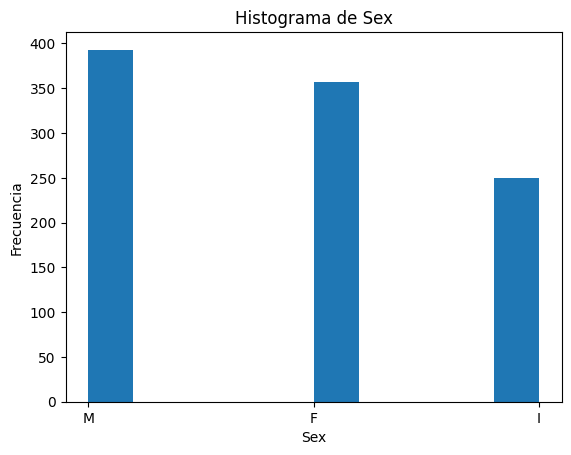

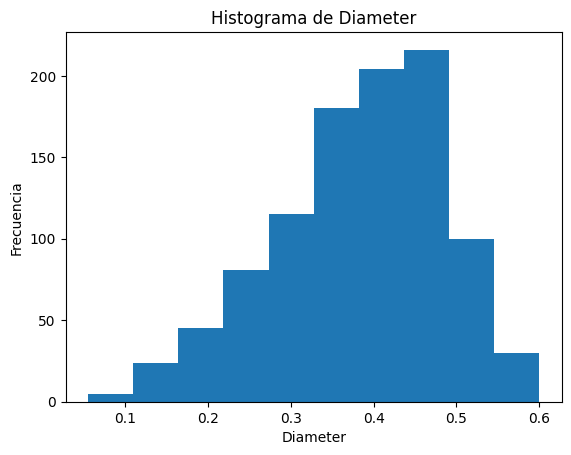

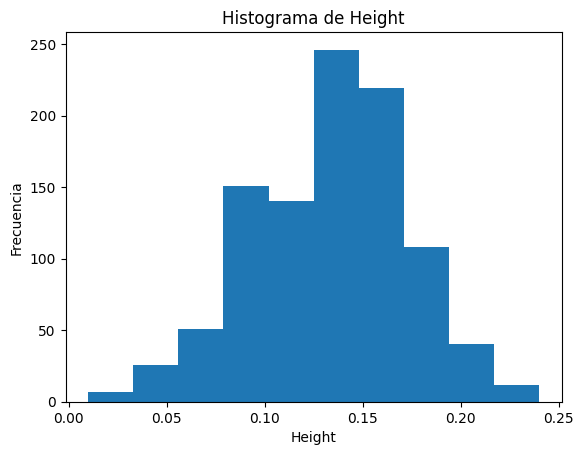

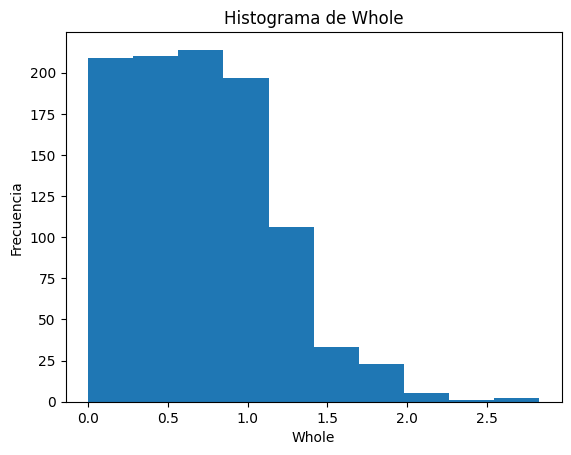

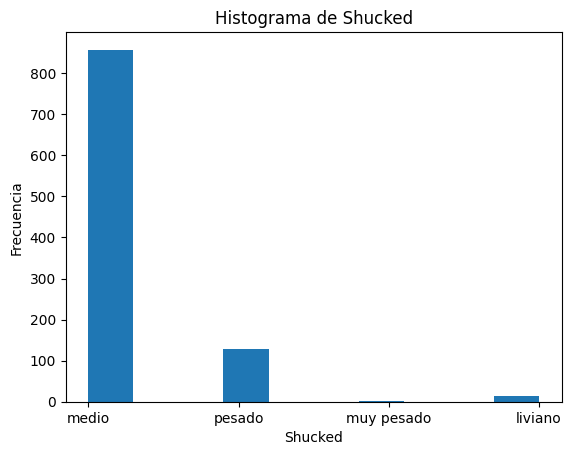

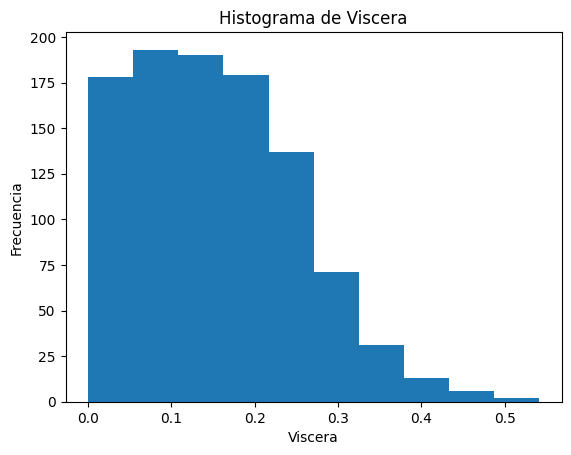

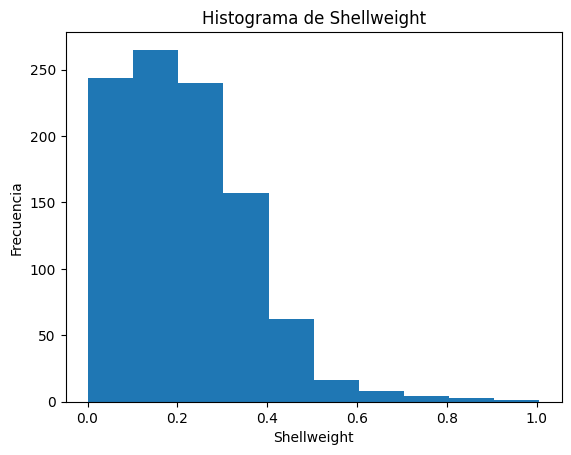

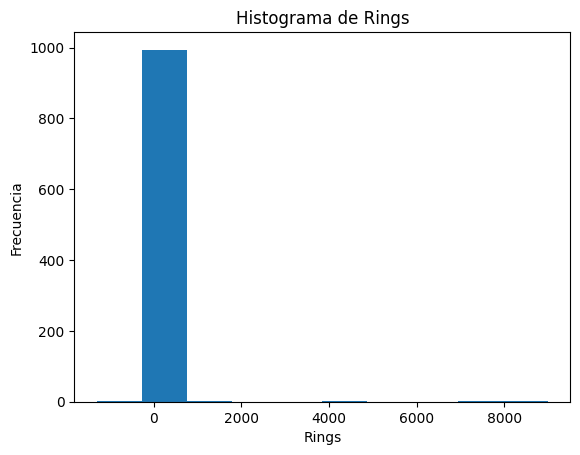

In [12]:
# 6 . Muestre un histograma de cada variable, comente lo que le parece relevantede la graficación

import matplotlib.pyplot as plt

# Variables a graficar
variables = ['Sex', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shellweight', 'Rings']
print(df)


# Graficar histograma de cada variable
for variable in variables:
    plt.hist(df[variable], bins=10)
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.title('Histograma de ' + variable)
    plt.show()




7. Explore el siguiente material asociado a sesgo en NLP: Chang, K. W.,
Prabhakaran, V., & Ordonez, V. (2019). Bias and Fairness in Natural
Language P

A. Respuesta:

En mi opinión, el sesgo en los modelos de PNL es un aspecto importante a tener en cuenta al entrenar estos modelos. El sesgo en los datos utilizados puede dar lugar a resultados injustos y discriminatorios. Para obtener un modelo más imparcial y preciso, es importante eliminar el sesgo y mejorar la calidad de los datos. Según lo informado por Mitchell et al. (2020) Existe la necesidad de identificar y mitigar los sesgos en los datos e implementar estrategias para equilibrar la representación de diferentes grupos. Además, un estudio de Bolukbasi et al. (2016) destacan que los modelos de incrustación de palabras pueden reflejar sesgos culturales y estereotipos de género presentes en los datos de capacitación, lo que destaca la necesidad de técnicas de mitigación de sesgos. Un informe de la UNESCO (2021) destaca la importancia de garantizar la diversidad y la representatividad de los datos y hace hincapié en la ética en el desarrollo de sistemas de PNL para evitar resultados injustos y la perpetuación de las desigualdades. Destaca la necesidad de un enfoque específico y responsable. En resumen, eliminar el sesgo y mejorar la calidad de los datos son pasos importantes para lograr modelos de PNL cada vez más equitativos.

Referencias:

Mitchell, M., et al. (2020). Model Cards for Model Reporting. NeurIPS 2020 Dataset and Benchmark Track.

Bolukbasi, T., et al. (2016). Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings. Proceedings of the 30th Conference on Neural Information Processing Systems (NIPS 2016).

UNESCO (2021). Steering AI and Advanced ICTs for Knowledge Societies. UNESCO Series on Artificial Intelligence.

B. Respuesta:

Se deben implementar estrategias y enfoques éticos para evitar problemas de sesgo y promover la equidad en los proyectos de ciencia de datos. Barocas, Hardt y Narayanan (2019) enfatizan la importancia de considerar la equidad en el aprendizaje automático y la necesidad de evaluar y mitigar el sesgo en los algoritmos y conjuntos de datos utilizados. Buolamwini y Gebru (2018) exploraron las diferencias en la clasificación de género y enfatizaron la importancia de abordar los problemas de equidad en los sistemas de reconocimiento facial. Friedler et al. (2019) realizaron un estudio comparativo de intervenciones para mejorar la equidad en el aprendizaje automático, destacando la necesidad de equidad y criterios de equidad  en el diseño del modelo. Estas referencias resaltan la necesidad de considerar la equidad y el sesgo en los proyectos de ciencia de datos y sugieren enfoques como la evaluación del sesgo, la transparencia y la participación para garantizar resultados justos y equitativos.

Referencias:

Barocas, S., Hardt, M., & Narayanan, A. (2019). Fairness and Machine Learning. In J. H. Altman, M. A. Gill, M. W. McDonald, & R. Mechler (Eds.), Climate Informatics (pp. 3-32). Cham: Springer. doi: 10.1007/978-3-030-17935-8_1

Buolamwini, J., & Gebru, T. (2018). Gender Shades: Intersectional Accuracy Disparities in Commercial Gender Classification. In Proceedings of the 1st Conference on Fairness, Accountability and Transparency (pp. 77-91). New York, NY: Association for Computing Machinery. doi: 10.1145/3178876.3186150

Friedler, S. A., Scheidegger, C., & Venkatasubramanian, S. (2019). A Comparative Study of Fairness-Enhancing Interventions in Machine Learning. In Proceedings of the Conference on Fairness, Accountability, and Transparency (pp. 329-338). New York, NY: Association for Computing Machinery. doi: 10.1145/3287560.3287598

